# 시계열 데이터 분석 (정석)


## #01. 작업준비

### 패키지 참조

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import seaborn as sb
import sys

### 그래프 초기화

In [ ]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 가져오기



In [3]:
df = pd.read_excel("https://data.hossam.kr/E06/air_passengers.xlsx",index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## #02. ARIMA 분석 수행

시계열 데이터를 계절 ARIMA 모델에 맞추려고 할 때 첫번째 목표는 측정항목을 최적화 하는 ARIMA(p,d,q)(P,D,Q,s) 값을 찾는것



In [14]:
# 기본 수행 -> order = (p,d,q)
# model = ARIMA(df['Passengers],order=(1,2,0))

## 계절성 고려 -> seasonal_order(P,D,Q,s)
## 월단위 데이터이므로 1년주기로 보고 주기를 12 로 설정 -> 분석가의 판단 필요
model = ARIMA(df['Passengers'],order=(1,2,0),seasonal_order=(1,2,0,12))
fit = model.fit()
print(fit.summary())

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                       Passengers   No. Observations:                  144
Model:             ARIMA(1, 2, 0)x(1, 2, 0, 12)   Log Likelihood                -509.419
Date:                          Fri, 04 Aug 2023   AIC                           1024.838
Time:                                  15:41:28   BIC                           1033.150
Sample:                              01-01-1949   HQIC                          1028.213
                                   - 12-01-1960                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6988      0.078     -9.008      0.000      -0.851      -0.547
ar.S.L12      -0.5743      0.087     -6.606      0.

### 학습 결과에 대한 예측값 생성


In [15]:
start_index = 0

end_index = len(df['Passengers'])
pd = fit.predict(start=start_index,end=end_index)
pd

1949-01-01      0.000000
1949-02-01    195.988808
1949-03-01    124.026712
1949-04-01    145.979273
1949-05-01    126.019141
                 ...    
1960-09-01    477.004006
1960-10-01    436.744842
1960-11-01    428.093455
1960-12-01    435.128564
1961-01-01    432.016710
Freq: MS, Name: predicted_mean, Length: 145, dtype: float64

### 이후 10단계의 예측값 생성

In [16]:
fc = fit.forecast(10)
fc

1961-01-01    432.016710
1961-02-01    395.569595
1961-03-01    404.189553
1961-04-01    459.418748
1961-05-01    455.818546
1961-06-01    499.898325
1961-07-01    589.469959
1961-08-01    547.689220
1961-09-01    438.423581
1961-10-01    376.157403
Freq: MS, Name: predicted_mean, dtype: float64

### 관측치와 예측치의 비교 결과 시각화


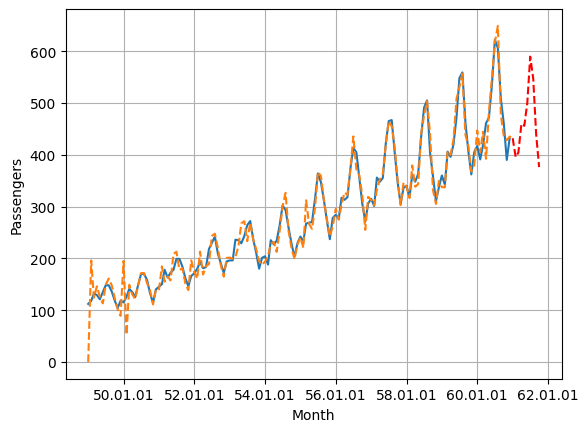

In [17]:
plt.figure()

# 원본 
sb.lineplot(x=df.index,y=df['Passengers'])
## 원본을 토대로 학습하여 예측한 값

sb.lineplot(x=pd.index, y =pd,linestyle='--')
## 이후 열단계를 예측한 값
sb.lineplot(x=fc.index,y=fc,linestyle='--',color='red')

plt.xlabel("Month")
plt.ylabel("Passengers")
## 그래프의 x축이 날짜로 구성되어 있는경우 형식 지정

monthyearFmt = mdates.DateFormatter("%y.%m.%d")
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()